In [ ]:
from google.colab import files

uploaded = files.upload()

Saving yelp_labelled.txt to yelp_labelled (1).txt


In [ ]:
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names=['sentences', 'labels'], sep='\t')

In [ ]:
df.head()

,sentences,labels
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail()

,sentences,labels
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
# Split folder into train and test sets
from sklearn.model_selection import train_test_split
sentence = df['sentences'].values
y = df['labels'].values
sentence_train, sentence_test, y_train, y_test = train_test_split(sentence, y, test_size=0.2)

In [ ]:
# Tokenization and padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(sentence_train)
tokenizer.fit_on_texts(sentence_test)

sequence_train = tokenizer.texts_to_sequences(sentence_train)
sequence_test = tokenizer.texts_to_sequences(sentence_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [ ]:
# Build the model
# We are not using Flatten, but GlobalAveragePooling1D which works better in NLP cases

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=None),
#    tf.keras.layers.Embedding(250, 16, input_length=20), # error, why?
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train the model
num_epochs = 30
history = model.fit(padded_train, y_train, epochs=num_epochs,
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 2s - loss: 0.6929 - accuracy: 0.5050 - val_loss: 0.6925 - val_accuracy: 0.4850 - 2s/epoch - 68ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.6915 - val_accuracy: 0.5300 - 164ms/epoch - 7ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6909 - accuracy: 0.5462 - val_loss: 0.6897 - val_accuracy: 0.5650 - 156ms/epoch - 6ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6881 - accuracy: 0.5775 - val_loss: 0.6858 - val_accuracy: 0.6100 - 211ms/epoch - 8ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6834 - accuracy: 0.6612 - val_loss: 0.6798 - val_accuracy: 0.6700 - 186ms/epoch - 7ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6757 - accuracy: 0.6662 - val_loss: 0.6699 - val_accuracy: 0.7250 - 155ms/epoch - 6ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6627 - accuracy: 0.6888 - val_loss: 0.6568 - val_accuracy: 0.6800 - 161ms/epoch - 6ms/step
Epoch 8/30
25/25 - 0s - loss: 0.6453 - accuracy: 0.7312 - val_loss: 0.6391 - val_accuracy: 0.7450 - 142ms/epoch - 6ms/step
Epoch 9/30
25/25 -

In [ ]:
model.evaluate(padded_train, y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.8850


[0.2783520221710205, 0.8849999904632568]

In [ ]:
model.evaluate(padded_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.8150


[0.4703630805015564, 0.8149999976158142]

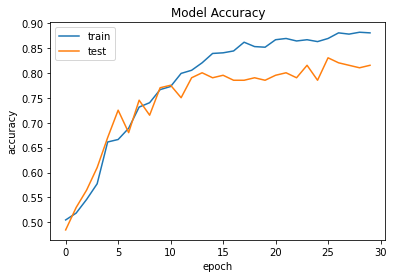

In [ ]:
# plot the accuracy of the model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

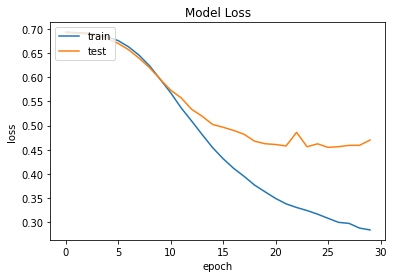

In [ ]:
# plot the loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()